                      TimeStamps  AnkleAccelerometer_x-axis (g)  \
0     2018-07-04T12:04:17.738369                         -1.005   
1     2018-07-04T12:04:17.738370                         -1.005   
2     2018-07-04T12:04:17.738371                         -1.005   
3     2018-07-04T12:04:17.738372                         -1.005   
4     2018-07-04T12:04:17.738373                         -1.008   
...                          ...                            ...   
2994                         NaN                         -1.938   
2995                         NaN                         -0.956   
2996                         NaN                          0.029   
2997                         NaN                          0.029   
2998                         NaN                         -0.587   

      AnkleAccelerometer_y-axis (g)  AnkleAccelerometer_z-axis (g)    SVM(n)  \
0                             0.229                         -0.083  1.034096   
1                             0.228

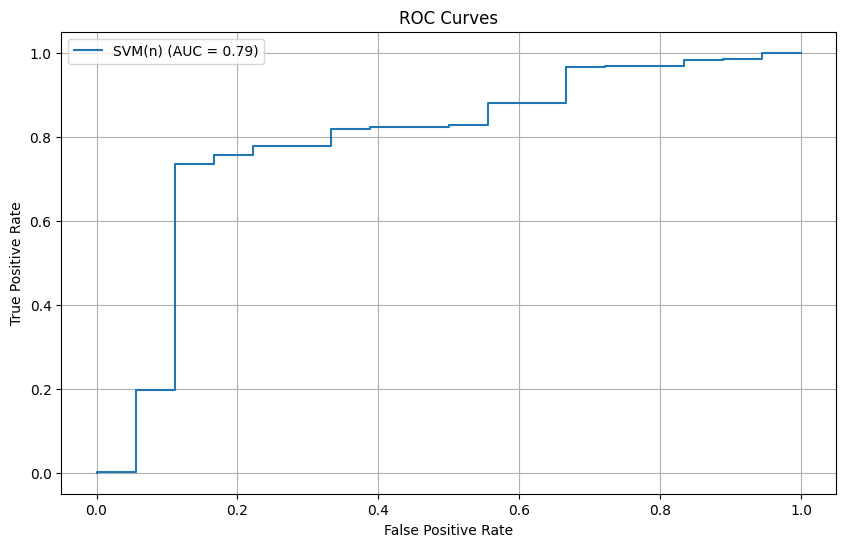

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification




# Read the dataset
data = pd.read_csv('falldetection_e.csv')

# Extract dataset until row 70316
df = data.iloc[:3000]

# Now 'extracted_df' contains the dataset up to row 70316

print(df)
#data.drop(columns=['Trial'])
df.replace('#VALUE!', 0, inplace=True)



# Convert all columns to numeric
#df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Assuming your DataFrame is named 'df'
#activity_counts = df['Activity'].value_counts()

# Print the counts
#print("Number of 0s in 'Activity' column:", activity_counts[0])
#print("Number of 1s in 'Activity' column:", activity_counts[1])


target_variable = 'Activity'

import pandas as pd

df['TimeStamps'] = pd.to_datetime(df['TimeStamps'])
# Add new columns to existing DataFrame
df['hours'] = df['TimeStamps'] .dt.hour
df['minutes'] = df['TimeStamps'].dt.minute
df['seconds'] = df['TimeStamps'].dt.second
df['milliseconds'] = df['TimeStamps'].dt.microsecond // 1000

#df.loc[:2998, 'Label1'] = 0
#df.loc[:2998, 'Label2'] =0
print(df)


from sklearn.model_selection import train_test_split

# Define target variable and features
features = df.drop(['Activity'], axis=1)  # Remove 'Theta(n)' from features

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target_variable], test_size=0.2, random_state=42)

# Train the model and store it in a dictionary
models = {}
model = SVC(probability=True)
model.fit(X_train[['SVM(n)']], y_train)  # Enclose 'SVM(n)' in quotes if it's a string
models['SVM(n)'] = model

# Plot ROC curve and find optimal threshold for each feature
plt.figure(figsize=(10, 6))
for feature, model in models.items():  # Iterate over items of dictionary
    # Predict probabilities
    y_proba = model.predict_proba(X_test[['SVM(n)']])[:, 1]  # Enclose 'SVM(n)' in quotes if it's a string

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})')

    # Calculate distances between ROC curve points and the point (0,1)
    distances = np.sqrt((1 - tpr)**2 + fpr**2)  # Make sure this line is indented correctly

min_distance_index = np.argmin(distances)

# Retrieve the corresponding thresholds
svm_threshold = thresholds[min_distance_index]

print("Optimal Threshold:", svm_threshold)
# Add the rest of your code for finding optimal thresholds here

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


Optimal Threshold: 0.9524858226182574


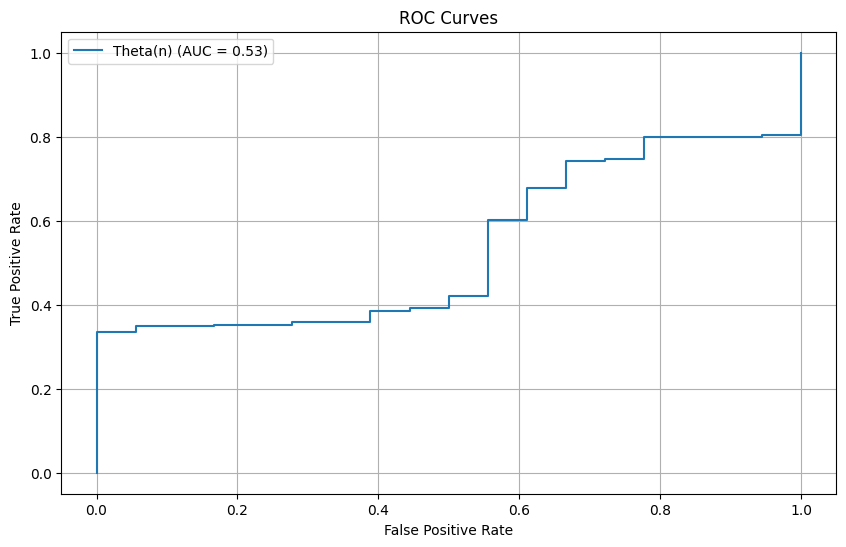

Accuracy: 0.540503744043567
Confusion Matrix:
[[  38   68]
 [1282 1550]]
      Activity  Label1
0            1       1
1            1       1
2            1       1
3            1       1
4            1       1
...        ...     ...
2933         0       0
2934         0       0
2935         0       1
2936         0       1
2937         0       1

[2938 rows x 2 columns]


In [34]:
models = {}
model = SVC(probability=True)
model.fit(X_train[['Theta(n)']], y_train)  # Enclose 'SVM(n)' in quotes if it's a string
models['Theta(n)'] = model

# Plot ROC curve and find optimal threshold for each feature
plt.figure(figsize=(10, 6))
for feature, model in models.items():  # Iterate over items of dictionary
    # Predict probabilities
    y_proba = model.predict_proba(X_test[['Theta(n)']])[:, 1]  # Enclose 'SVM(n)' in quotes if it's a string

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})')

    # Calculate distances between ROC curve points and the point (0,1)
    distances = np.sqrt((1 - tpr)**2 + fpr**2)  # Make sure this line is indented correctly

min_distance_index = np.argmin(distances)

# Retrieve the corresponding thresholds
theta_threshold = thresholds[min_distance_index]

print("Optimal Threshold:", theta_threshold)
# Add the rest of your code for finding optimal thresholds here

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()
# Define sampling rate (1 ms per sample)
sampling_rate = 1  # milliseconds

# Define time frame for mean SVM calculation (1 second)
time_frame_seconds = 1
time_frame_samples = int(time_frame_seconds * 1000 / sampling_rate)

# Initialize lists to store predictions and ground truth labels
'''
predictions = []
ground_truth = []

for i in range(len(df)):
    if df['SVM(n)'][i] > 0.583:
        # Analyze THETA feature in subsequent samples
        if df['Theta(n)'][i] > 0.949:
            # Check mean SVM in a time frame of 1 second
            start_idx = max(0, i - time_frame_samples // 2)
            end_idx = min(len(df), i + time_frame_samples // 2)
            mean_svm = np.mean(df['SVM(n)'][start_idx:end_idx])

            # Detect falls if mean SVM is less than 1.2
            if mean_svm < 1.2:
                predictions.append(1)  # Predicted fall
            else:
                predictions.append(0)  # Predicted non-fall
        else:
            predictions.append(0)  # Predicted non-fall
    else:
        predictions.append(0)  # Predicted non-fall

    # Populate ground truth labels if available
    # Replace this with your actual ground truth labels
    ground_truth.append(df['Activity'][i])

# Compute accuracy
accuracy = sum(1 for p, gt in zip(predictions, ground_truth) if p == gt) / len(predictions)

# Optionally, compute confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ground_truth, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print(df['Activity'])

print(predictions)
'''
# Initialize lists to store predictions and ground truth labels
predictions = []

for i in range(len(df)):
    if df['SVM(n)'][i] > 0.583:
        # Analyze THETA feature in subsequent samples
        if df['Theta(n)'][i] > 0.949:
            # Check mean SVM in a time frame of 1 second
            start_idx = max(0, i - time_frame_samples // 2)
            end_idx = min(len(df), i + time_frame_samples // 2)
            mean_svm = np.mean(df['SVM(n)'][start_idx:end_idx])

            # Detect falls if mean SVM is less than 1.2
            if mean_svm < 1.2:
                predictions.append(1)  # Predicted fall
            else:
                predictions.append(0)  # Predicted non-fall
        else:
            predictions.append(0)  # Predicted non-fall
    else:
        predictions.append(0)  # Predicted non-fall

# Create a new column 'Label1' in the DataFrame and assign predictions to it
df['Label1'] = predictions

# Compute accuracy
accuracy = sum(1 for p, gt in zip(predictions, df['Activity']) if p == gt) / len(predictions)

# Optionally, compute confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df['Activity'], predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print(df[['Activity', 'Label1']])






In [ ]:
# Example of true labels (0 for non-falls, 1 for falls)
true_labels = np.zeros(len(THETA_angles))
true_labels[falls] = 1  # Marking the indices where falls are detected as 1

# Assuming you have predicted labels from another method
# For simplicity, let's assume all samples are predicted as non-falls (0)
predicted_labels = np.zeros(len(THETA_angles))

# Calculate accuracy
accuracy = np.mean(true_labels == predicted_labels)
print("Accuracy:", accuracy)


Optimal Threshold: 1.9625742837090574


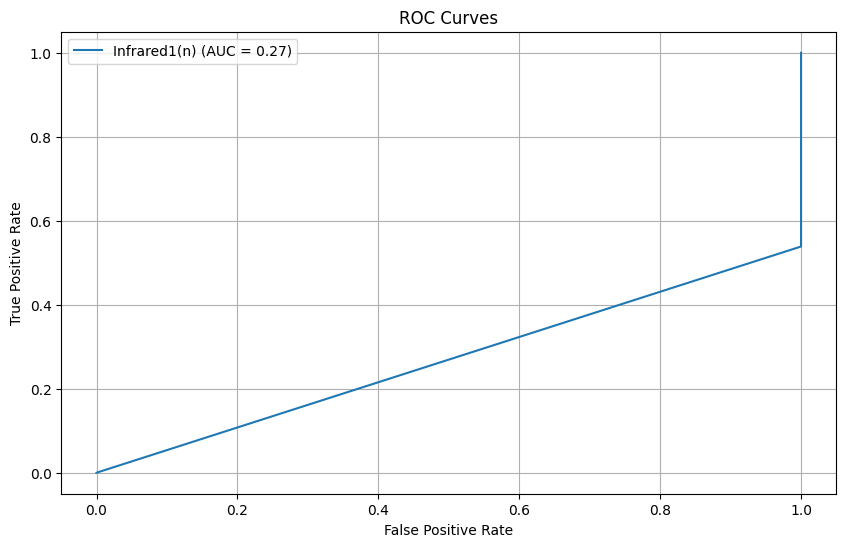

In [22]:


# Train the model and store it in a dictionary
models = {}
model = SVC(probability=True)
model.fit(X_train[['Infrared1(n)']], y_train)  # Enclose 'SVM(n)' in quotes if it's a string
models['Infrared1(n)'] = model

# Plot ROC curve and find optimal threshold for each feature
plt.figure(figsize=(10, 6))
for feature, model in models.items():  # Iterate over items of dictionary
    # Predict probabilities
    y_proba = model.predict_proba(X_test[['Infrared1(n)']])[:, 1]  # Enclose 'SVM(n)' in quotes if it's a string

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})')

    # Calculate distances between ROC curve points and the point (0,1)
    distances = np.sqrt((1 - tpr)**2 + fpr**2)  # Make sure this line is indented correctly

min_distance_index = np.argmin(distances)

# Retrieve the corresponding thresholds
I1_threshold = thresholds[min_distance_index]

print("Optimal Threshold:", I1_threshold)
# Add the rest of your code for finding optimal thresholds here

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


Optimal Threshold: 1.962574286876434


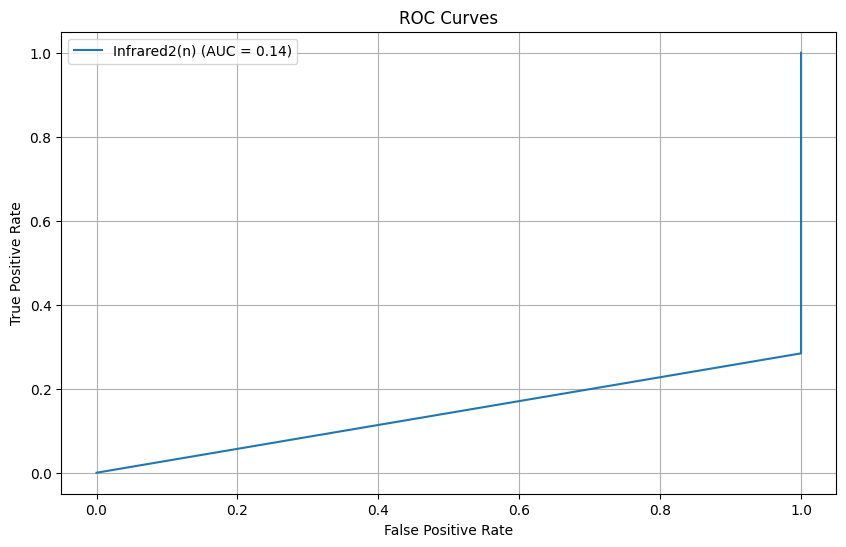

Accuracy: 0.540503744043567
Confusion Matrix:
[[  38   68]
 [1282 1550]]
      Activity  Label2
0            1       0
1            1       0
2            1       0
3            1       0
4            1       0
...        ...     ...
2933         0       0
2934         0       0
2935         0       0
2936         0       0
2937         0       0

[2938 rows x 2 columns]


In [36]:
models = {}
model = SVC(probability=True)
model.fit(X_train[['Infrared2(n)']], y_train)  # Enclose 'SVM(n)' in quotes if it's a string
models['Infrared2(n)'] = model

# Plot ROC curve and find optimal threshold for each feature
plt.figure(figsize=(10, 6))
for feature, model in models.items():  # Iterate over items of dictionary
    # Predict probabilities
    y_proba = model.predict_proba(X_test[['Infrared2(n)']])[:, 1]  # Enclose 'SVM(n)' in quotes if it's a string

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})')

    # Calculate distances between ROC curve points and the point (0,1)
    distances = np.sqrt((1 - tpr)**2 + fpr**2)  # Make sure this line is indented correctly

min_distance_index = np.argmin(distances)

# Retrieve the corresponding thresholds
I2_threshold = thresholds[min_distance_index]

print("Optimal Threshold:", I2_threshold)
# Add the rest of your code for finding optimal thresholds here

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()
# Define sampling rate (1 ms per sample)
sampling_rate = 1  # milliseconds

# Define time frame for mean SVM calculation (1 second)
time_frame_seconds = 1
time_frame_samples = int(time_frame_seconds * 1000 / sampling_rate)

# Initialize lists to store predictions and ground truth labels
p = []

for i in range(len(df)):
    if df['Infrared1(n)'][i] > 1.96257:
        # Analyze THETA feature in subsequent samples
        if df['Infrared2(n)'][i] > 1.97:
            # Check mean SVM in a time frame of 1 second
            start_idx = max(0, i - time_frame_samples // 2)
            end_idx = min(len(df), i + time_frame_samples // 2)
            mean_ir = np.mean(df['Infrared1(n)'][start_idx:end_idx])

            # Detect falls if mean SVM is less than 1.2
            if mean_ir < 1.2:
                p.append(1)  # Predicted fall
            else:
                p.append(0)  # Predicted non-fall
        else:
            p.append(0)  # Predicted non-fall
    else:
        p.append(0)  # Predicted non-fall

# Create a new column 'Label1' in the DataFrame and assign predictions to it
df['Label2'] = p

# Compute accuracy
accuracy = sum(1 for pi, gt in zip(predictions, df['Activity']) if pi == gt) / len(predictions)

# Optionally, compute confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df['Activity'], predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print(df[['Activity', 'Label2']])


In [ ]:
def fuzzy_to_binary(label1, label2):
    """
    Convert fuzzy combinations of Label1 and Label2 to binary values.

    Args:
    - label1 (int): Value of Label1 (0 or 1)
    - label2 (int): Value of Label2 (0 or 1)

    Returns:
    - binary_value (int): Binary representation of fall (1) or not fall (0)
    """
    if label1 == 0 and label2 == 0:
        return 0  # Not fall
    elif label1 == 1 and label2 == 0:
        return 1  # Fall
    elif label1 == 0 and label2 == 1:
        return 1  # Fall
    elif label1 == 1 and label2 == 1:
        return 1  # Fall

# Apply the fuzzy_to_binary function to create a new column 'FuzzyLabel'
df['FuzzyLabel'] = df.apply(lambda row: fuzzy_to_binary(row['Label1'], row['Label2']), axis=1)

# Display the DataFrame with the new 'FuzzyLabel' column
print(df[['Label1', 'Label2', 'FuzzyLabel']])


In [39]:
import numpy as np

# Define a function to map the fuzzy values to binary values
def map_fuzzy_to_binary(Label1, Label2):
    result = []
    for l1, l2 in zip(Label1, Label2):
        if l1 == 0 and l2 == 0:
            result.append(0)  # Not fall
        else:
            result.append(1)  # Fall
    return result

# Apply the mapping function to label1 and label2 columns
df['binary_label'] = map_fuzzy_to_binary(df['Label1'], df['Label2'])

# Now df['binary_label'] contains the binary representation of fall/non-fall
print(df['binary_label'])

# Compute accuracy
accuracy = sum(1 for p, gt in zip(df['binary_label'], ground_truth) if p == gt) / len(df['binary_label'])

print("Accuracy:", accuracy)



0       1
1       1
2       1
3       1
4       1
       ..
2933    0
2934    0
2935    1
2936    1
2937    1
Name: binary_label, Length: 2938, dtype: int64
Accuracy: 0.540503744043567
